


# Pokemon Classification with CNN

**In this notebook we will build a CNN to classify 5 pokemon images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

In [ ]:
!cp -r /content/drive/MyDrive/Pokemon\ Classification  /content/sample_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3 style='color:purple'>Dependencies</h3>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h3 style='color:purple'>Load Pokemon dataset</h3>

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/sample_data/Pokemon Classification')
data_dir

PosixPath('/content/sample_data/Pokemon Classification')

In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

615


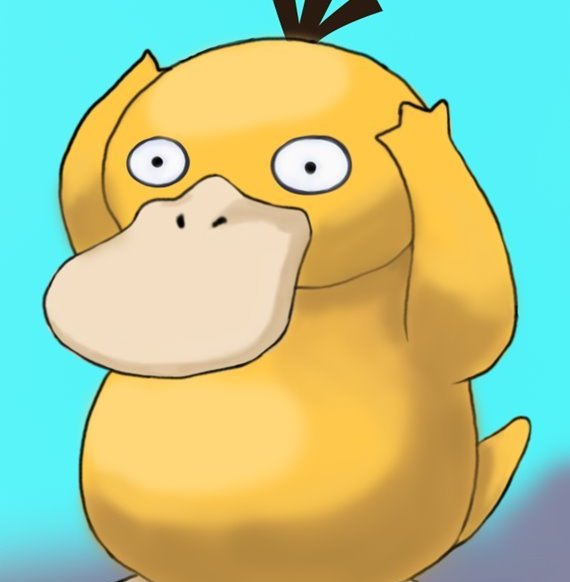

In [ ]:
PIL.Image.open(str(Psyduck[1]))

<h3 style='color:purple'>Read Pokemon images from disk into numpy array using opencv</h3>

In [ ]:
pokemon_images_dict = {
    'Psyduck': list(data_dir.glob('Psyduck/*')),
    'Pikachu': list(data_dir.glob('Pikachu/*')),
    'Charmander': list(data_dir.glob('Charmander/*')),
    'Jigglypuff': list(data_dir.glob('Jigglypuff/*')),
    'Meowth': list(data_dir.glob('Meowth/*')),
    'Squirtle': list(data_dir.glob('Squirtle/*'))
}


In [ ]:
pokemon_labels_dict = {
    'Psyduck': 0,
    'Pikachu' : 1,
    'Charmander': 2,
    'Jigglypuff': 3,
    'Meowth': 4,
    'Squirtle': 5,
}


In [ ]:
pokemon_images_dict['Psyduck'][:5]

[PosixPath('/content/sample_data/Pokemon Classification/Psyduck/30da4e01a53d474489503def2b32c238.jpg'),
 PosixPath('/content/sample_data/Pokemon Classification/Psyduck/a10a7424fd9144eea1982e47b5012b15.jpg'),
 PosixPath('/content/sample_data/Pokemon Classification/Psyduck/6ba31b9a5ee14f1db32a4854fca05171.jpg'),
 PosixPath('/content/sample_data/Pokemon Classification/Psyduck/953df6bccc0246659ddb1befb1e9c343.jpg'),
 PosixPath('/content/sample_data/Pokemon Classification/Psyduck/94a9e4ae20744434a9e77a739e4d803d.jpg')]

<h3 style='color:purple'>Preparing the Dataset </h3>

In [ ]:
x, y = [], []

for pokemon_name, images in pokemon_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is None:
          print("Error reading image:", image)
          continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(pokemon_labels_dict[pokemon_name])

Error reading image: /content/sample_data/Pokemon Classification/Pikachu/pikachu-transparent-32.gif


In [ ]:
x = np.array(x)
y = np.array(y)

<h3 style='color:purple'>Train test split : 0.75 Training and 0.25 Testing Default</h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Building convolutional neural network

# CNN Architecture

- **Convolutional layers:**
  - 3 layers with increasing filters (16, 32, and 64)
  - Kernel size: 3x3
  - Padding: 'same'
  - Activation: ReLU

- **MaxPooling layers:**
  - After each convolutional layer

- **Flatten layer**

- **Fully connected (Dense) layers:**
  - 2 layers with 128 units each
  - Activation: ReLU for both

- **Final Dense layer:**
  - Units: Number of classes (specified by `num_classes`)
  - No activation specified (outputs logits)

# Compilation

- **Optimizer:** Adam
- **Loss function:** Sparse categorical cross-entropy (from logits)
- **Metrics:** Accuracy


In [ ]:
num_classes = 6

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<h3 style='color:purple'>Training the Model</h3>

Epoch 1/8
15/15 [==============================] - 17s 1s/step - loss: 1.7931 - accuracy: 0.3652
Epoch 2/8
15/15 [==============================] - 15s 997ms/step - loss: 0.7655 - accuracy: 0.7500
Epoch 3/8
15/15 [==============================] - 15s 1s/step - loss: 0.5091 - accuracy: 0.8261
Epoch 4/8
15/15 [==============================] - 16s 1s/step - loss: 0.2635 - accuracy: 0.9261
Epoch 5/8
15/15 [==============================] - 19s 1s/step - loss: 0.1476 - accuracy: 0.9543
Epoch 6/8
15/15 [==============================] - 15s 1s/step - loss: 0.0798 - accuracy: 0.9804
Epoch 7/8
15/15 [==============================] - 15s 1s/step - loss: 0.0410 - accuracy: 0.9913
Epoch 8/8
15/15 [==============================] - 15s 1s/step - loss: 0.0676 - accuracy: 0.9870
Testing set 
5/5 [==============================] - 2s 362ms/step - loss: 0.3574 - accuracy: 0.8896

Test Loss: 0.35741564631462097
Test Accuracy: 0.8896104097366333



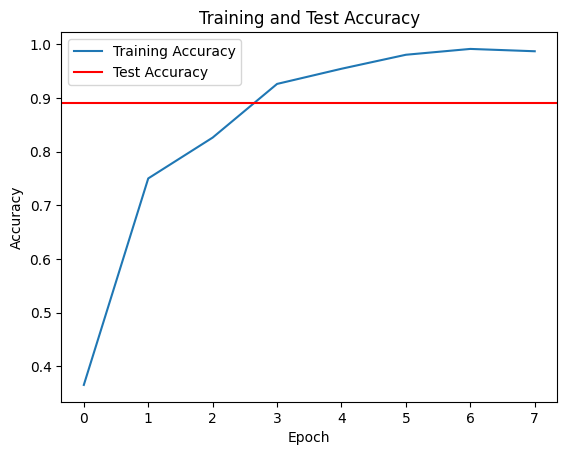

In [ ]:
# Train the model
training_history = model.fit(X_train_scaled, y_train, epochs=8)

# Plot training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')

print("Testing set ")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print()
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print()

# Plot test accuracy
plt.axhline(y=test_accuracy, color='r', label='Test Accuracy')

plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Here we see that while train accuracy is very high (98%), the test accuracy is decent (88.96%) indicating overfitting. Let's make it a little better by using data augmentation to address the limited amount of dataset**


<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [ ]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

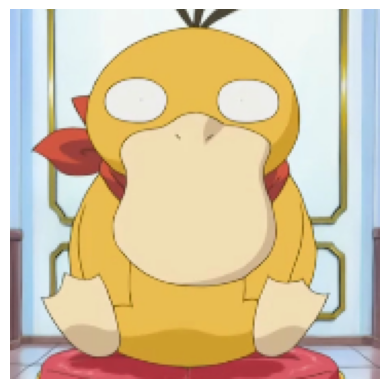

In [ ]:
plt.axis('off')
plt.imshow(x[16])

**Newly generated training sample using data augmentation**

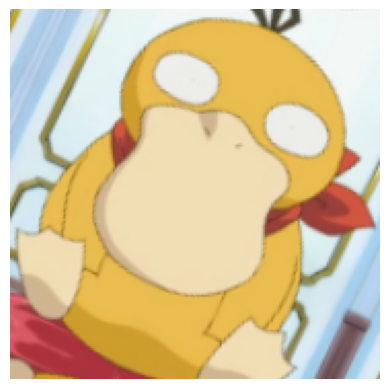

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[16].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [ ]:
num_classes = 6

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/12
15/15 [==============================] - 22s 1s/step - loss: 1.8660 - accuracy: 0.4283
Epoch 2/12
15/15 [==============================] - 17s 1s/step - loss: 0.9567 - accuracy: 0.6826
Epoch 3/12
15/15 [==============================] - 17s 1s/step - loss: 0.6649 - accuracy: 0.7587
Epoch 4/12
15/15 [==============================] - 20s 1s/step - loss: 0.5911 - accuracy: 0.7826
Epoch 5/12
15/15 [==============================] - 17s 1s/step - loss: 0.4430 - accuracy: 0.8304
Epoch 6/12
15/15 [==============================] - 19s 1s/step - loss: 0.3480 - accuracy: 0.8826
Epoch 7/12
15/15 [==============================] - 18s 1s/step - loss: 0.4042 - accuracy: 0.8565
Epoch 8/12
15/15 [==============================] - 17s 1s/step - loss: 0.3331 - accuracy: 0.8891
Epoch 9/12
15/15 [==============================] - 17s 1s/step - loss: 0.2209 - accuracy: 0.9130
Epoch 10/12
15/15 [==============================] - 21s 1s/step - loss: 0.1979 - accuracy: 0.9348
Epoch 11/12
15/15 [

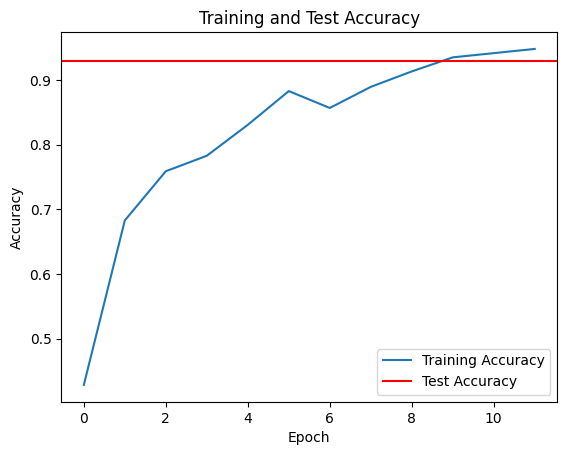

In [ ]:
# Train the model
training_history = model.fit(X_train_scaled, y_train, epochs=12)

# Plot training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')

print("Testing set ")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print()
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print()

# Plot test accuracy
plt.axhline(y=test_accuracy, color='r', label='Test Accuracy')

plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**We can see that by using data augmentation and drop out layer the accuracy of test set predictions is Increased to 92.85% means it generalizes examples better than before**

<h3 style='color:purple'>Prediction Lab </h3>

In [ ]:
from PIL import Image
import numpy as np

# Loading the image from the local directory
image_path = '/content/Pikachu.webp'
image = Image.open(image_path)

image = image.convert('RGB')
# Preprocess the image
image = image.resize((180, 180))
image = np.array(image) / 255.0


# Passing the image to your model for prediction
Finalprediction = model.predict(np.expand_dims(image, axis=0))

FinalScore = tf.nn.softmax(Finalprediction)

# Display the results
print(Finalprediction)

1/1 [==============================] - 0s 74ms/step
[[-7.8073535   7.632371    8.402395    0.03259604 -2.444238   18.050194  ]]


In [ ]:

pokemon_names = {
    0: 'Psyduck',
    1: 'Pikachu',
    2: 'Charmander',
    3: 'Jigglypuff',
    4: 'Meowth',
    5: 'Squirtle'
}

predicted_pokemon_index = np.argmax(FinalScore)
predicted_pokemon_name = pokemon_names[predicted_pokemon_index]

print(f"Predicted Pokemon: {predicted_pokemon_name}")


Predicted Pokemon: Squirtle
